In [1]:
import torch
import torch.nn as nn
import torchvision

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

You only need to import __`lr_find`__ and __`plot_lr_find`__ from `lr_find.py`.

For the coding part, you only need to change lr_find function, in cases where your data pipeline is not standard. lr_find is built using the standard data pipeline where your dataloader gives you two values as a tuple, __(inputs, labels)__ and then your give them to your model. In case you use complex data pipline, you would have to change that and changing it is as simple as copying your train step.

```python
################### TO BE MODIFIED ###################
# Depending on your model, you will have to modify your
# data pipeline and how you give inputs to your model.
inputs, labels = data
if use_gpu:
    inputs = inputs.to(device)
    labels = inputs.to(device)

outputs = model(inputs)
loss = loss_fn(outputs, labels)
#####################################################
```

And the second optional change that you can do in the __`lr_find`__ is disable AdamW. For those that don't know, pytorch implements the regularization in Adam incorrectly (issue being discussed on [github](https://github.com/pytorch/pytorch/pull/3740)). AdamW solves this. For more info about AdamW read [this](https://www.fast.ai/2018/07/02/adam-weight-decay/). To disable, just comment out the lines.

And in cases where you are maximizing loss function, you would have to change that as well in the function. But I doubt that anyone would ever need that.

## 1. How to use lr_find.py

In [2]:
# You only need to import 2 functions. There are many other functions 
# in the script as well, but you will never need to modify them.
from src.lr_find import lr_find, plot_lr_find

## 2. Create model and data_loader
This step would be specific to your project. I show a short example here with resnet18

In [3]:
# Get data
path = '/home/kushaj/Desktop/Data/cifar10/train/'
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.ImageFolder(path, transform=transform)
data = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=8)

# Create model
device = torch.device('cuda')
model = torchvision.models.resnet18()  # Not using pretrained
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)  
# You do not need to worry about lr here, just set it to any value

## 3. Use lr_find

In [4]:
losses, lrs = lr_find(data, model, criterion, optim)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
LR Finder is complete.


## 4. Plot the learning_rate vs losses

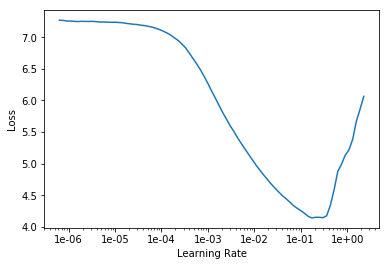

In [5]:
# I have some other plans to use the above losses and lrs, so I did not merge 
# the two functions, but you can easily merge the functions if you want.
plot_lr_find(losses, lrs)

Min numerical gradient: 1.20E-03


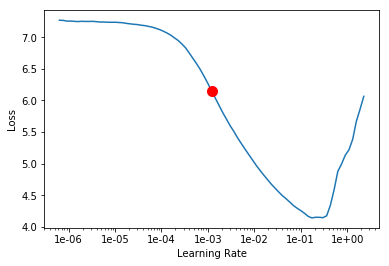

In [6]:
plot_lr_find(losses, lrs, suggestion=True)

For reference I show below the plot for a similiar model on fastai. 

There are some changes with the fastai model, like the betas=(0.9, 0.99) for Adam and fastai uses Adam in a different way with momentum. But the results are very similiar.

<img src='Images/fastai_lr_find.png' style='width:400px'>

This is the fastai plot

## 5. Get the value of learning rate from the graph
This comes to experience but the general guideline, is to see when the loss begins to increase and take the lr value close to it and for the other lr take one-tenth of the previous one. In order to get better intuitions about the above plots, I highly recomment Jeremy's Deep learning course [Practical Deep Learning for Coders, v3](https://course.fast.ai/)

I am making a blog about this, so if you want to read state of the art techniques for training nerual networks in 2019, you can read that blog. I will update the link to blog in the README when it is ready.

## Extra tests
For completeness, I use a pretrained model and then compare the two plots

In [7]:
model = torchvision.models.resnet18(pretrained=True)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)  

In [8]:
losses, lrs = lr_find(data, model, criterion, optim)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
LR Finder is complete.


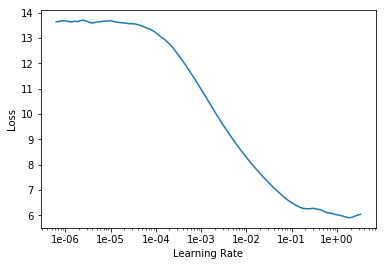

In [9]:
plot_lr_find(losses, lrs)

Below is the fastai plot for the same model

<img src='Images/fastai_lr_find_trained.png' style='width:400px'>